In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
# Cleaned dataset for Training
cleaned_incidents = pd.read_csv('San Francisco Crime by Neighborhood and Tract.csv')
# Feature key reference
features_key = pd.read_csv('San Francisco Crime by Neighborhood Feature Key.csv')
# Clean dataset for Testing
ny_incidents = pd.read_csv('NY Crime By Neighborhood.csv').dropna(1).drop(columns = ['neighborhood','tract_no'])


In [3]:
# Helper methods that faciliate computing for summary statistics
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

def AIC(features, samples, sse):
    return 2 * features - 2 * np.log(sse)

def BIC(features, samples, sse):
    return samples * np.log(sse/samples) + features * np.log(samples)


### Is this a supervised or unsupervised learning problem? Explain your reasoning.

**This is a supervised learning problem because we are using our existing data along with all the features/labels associated with the data to infer the relationship between the inputs and the output. In context, since we are extracting the features we can observe in our data to train an algorithm to fit an model to predict future crime rates of neighborhoods. In contrast, unsupervised learning is used in situations where we don't know the response outcome but use the algorithm to uncover the underlying pattern behind the observed data and features.**


### Clean and manipulate the data so that you have information about the amount of crime per neighborhood per month from 2003-2017.
Bonus: Report some descriptive statistics or mapping that will help you explore the data before fitting the
machine learning models.

In [6]:
cleaned_incidents = cleaned_incidents.dropna(1).drop(columns = ['neighborhood','tractce10'])
cleaned_incidents.head()

,Month_Year,number_crimes,VC03,VC04,VC05,VC06,VC07,VC08,VC09,VC10,...,VC203,VC204,VC205,VC206,VC207,VC208,VC209,VC210,VC211,VC212
0,01/2003,168,2059,815,178,545,140,17,0,253,...,40,10,13,0,0,22,0,0,0,14
1,01/2004,162,2059,815,178,545,140,17,0,253,...,40,10,13,0,0,22,0,0,0,14
2,01/2005,174,2059,815,178,545,140,17,0,253,...,40,10,13,0,0,22,0,0,0,14
3,01/2006,185,2059,815,178,545,140,17,0,253,...,40,10,13,0,0,22,0,0,0,14
4,01/2007,153,2059,815,178,545,140,17,0,253,...,40,10,13,0,0,22,0,0,0,14



###  Partition your data into training, validation, and test sets.  .
How much data should be used for each, and why? What are the tradeoffs with various choices?


In [8]:
# the features used to predict riders
np.random.seed(100)

X = cleaned_incidents.drop(columns = ['Month_Year', 'number_crimes'])

# the number of riders
y = cleaned_incidents['number_crimes']

# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)
# split the data
# Returns 4 values: X_train, X_validate, y_train, y_validate

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

**I split the dataset by the keeping 80% of it as the training dataset and 20% as the test set. Inside the training dataset, I keep 75% as the training set while 25% as the validation set. The split ratio used in machine learning is subjective. However, if the training set accounts for a higher proportion of the sample while the test set is relatively smaller, then the model tends to overfitting, which means that it is good at predicting the testing set but may not be good at predicting more general data. Similarly, if the training set accounts for a smaller size, then the model tends to underfitting, which means that due to the lack of data, the model may not be good at capturing the underlying trend.**


### Is this a classification or regression problem? Why?

**For the same reason above arguing that this is a supervised learning problem, this is a regression problem since we are trying to incorporate these features to design a model that can predict the future outcome of crime rates, given that we already know the crime rates of some neighborhoods.**


### Choose 3 different machine learning/prediction techniques. Detail the basic logic underlying each, the pros and cons, whether it is parametric or nonparametric etc. Also discuss why it may be an appropriate choice for this particular problem. ###
In class we learned OLS, Ridge, and LASSO. You are strongly encouraged to explore other methods as well. There are many features in the dataset; you will need to make choices about which ones to include. Note: The features may have low variance because they repeat information for each recorded observation of the neighborhood. This may pose a problem depending on your choice of model and require some data manipulation on your part.

### Train each of the models on your data, and report any relevant summary statistics.
How well does each model fit the training data?

In [9]:
# Correlatin table for features
corrmat = cleaned_incidents.corr()

# Extract the features that has a correlation coefficient greater than 0.01
corr_boolean = np.abs(np.array(corrmat.iloc[:1])[0]) >= 0.005

features = np.array(corrmat.columns)[corr_boolean]
#features_key.loc[features_key['Feature'] == 'VC122'].values[0][1:][0]
features_in_NY = []
for i in np.array(ny_incidents.columns):
    if i in features:
        features_in_NY += [i]
features = np.array(features_in_NY)
features

array(['number_crimes', 'VC03', 'VC04', 'VC05', 'VC07', 'VC08', 'VC09',
       'VC10', 'VC11', 'VC12', 'VC13', 'VC14', 'VC17', 'VC18', 'VC27',
       'VC29', 'VC30', 'VC31', 'VC32', 'VC36', 'VC37', 'VC38', 'VC39',
       'VC40', 'VC41', 'VC43', 'VC44', 'VC45', 'VC46', 'VC47', 'VC48',
       'VC52', 'VC53', 'VC62', 'VC63', 'VC65', 'VC66', 'VC67', 'VC68',
       'VC70', 'VC71', 'VC72', 'VC76', 'VC77', 'VC78', 'VC79', 'VC80',
       'VC81', 'VC85', 'VC86', 'VC87', 'VC89', 'VC90', 'VC92', 'VC100',
       'VC101', 'VC105', 'VC106', 'VC108', 'VC109', 'VC111', 'VC112',
       'VC114', 'VC115', 'VC119', 'VC120', 'VC121', 'VC122', 'VC123',
       'VC124', 'VC125', 'VC126', 'VC130', 'VC131', 'VC132', 'VC133',
       'VC134', 'VC135', 'VC136', 'VC140', 'VC141', 'VC142', 'VC146',
       'VC149', 'VC151', 'VC154', 'VC155', 'VC156', 'VC160', 'VC161',
       'VC162', 'VC163', 'VC164', 'VC165', 'VC166', 'VC170', 'VC171',
       'VC172', 'VC173', 'VC174', 'VC175', 'VC176', 'VC177', 'VC178',
       'VC1

In [10]:
# the features used to predict riders
np.random.seed(100)

X = cleaned_incidents[features].drop(columns = ['number_crimes'])

# the number of riders
y = cleaned_incidents['number_crimes']

# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)
# Returns 4 values: X_train, X_validate, y_train, y_validate

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

***OLS Linear Regression***

In [11]:
lin_model_reg = LinearRegression()
lin_model = lin_model_reg.fit(X_train, y_train)

#predict X_train using the model
lin_train_pred = lin_model.predict(X_train)

#predict X_validate using the model
lin_validate_pred = lin_model.predict(X_validate)


In [12]:
# Summary statistics 
lin_train_error = rmse(lin_train_pred, y_train)
lin_validate_error = rmse(lin_validate_pred, y_validate)
lin_train_aic = AIC(X_train.shape[1], X_train.shape[0], X_train.shape[0] * lin_train_error ** 2)
lin_validate_aic = AIC(X_validate.shape[1], X_validate.shape[0], X_validate.shape[0] * lin_validate_error ** 2)
lin_train_bic = BIC(X_train.shape[1], X_train.shape[0], X_train.shape[0] * lin_train_error ** 2)
lin_validate_bic = BIC(X_validate.shape[1], X_validate.shape[0], X_validate.shape[0] * lin_validate_error ** 2)

print("Training RMSE:", lin_train_error)
print("Validation RMSE:", lin_validate_error)
print("Training AIC:", lin_train_aic)
print("Validation AIC:", lin_validate_aic)
print('Training R2:', r2_score(lin_train_pred, y_train))
print('Validation R2:', r2_score(lin_validate_pred, y_validate))


Training RMSE: 229.44644060499132
Validation RMSE: 225.56235466083203
Training AIC: 226.33597955589525
Validation AIC: 228.6014960929619
Training R2: 0.5224564266569557
Validation R2: 0.5283433032789296


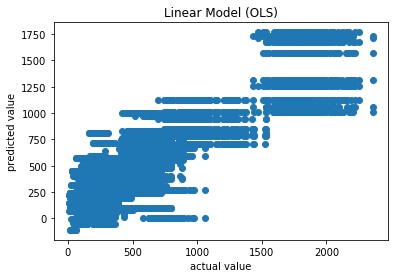

In [13]:
plt.scatter(y_train, lin_train_pred)
plt.title('Linear Model (OLS)')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [14]:
# Feature selection
for i in np.arange(0, 0.2, 0.001):
    corr_boolean = np.abs(np.array(corrmat.iloc[:1])[0]) >= i
    features = np.array(corrmat.columns)[corr_boolean]
    
    np.random.seed(100)
    X = cleaned_incidents[features].drop(columns = ['number_crimes'])
    y = cleaned_incidents['number_crimes']
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)
    X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)
    lin_model_reg = LinearRegression()
    lin_model = lin_model_reg.fit(X_train, y_train)
    lin_train_pred = lin_model.predict(X_train)
    lin_validate_pred = lin_model.predict(X_validate)
    
    lin_train_error = rmse(lin_train_pred, y_train)
    lin_validate_error = rmse(lin_validate_pred, y_validate)
    print('Feature Correlation Threshold', i)
    print("Training RMSE:", lin_train_error)
    print('Training R2:', r2_score(lin_train_pred, y_train), '\n')    

Feature Correlation Threshold 0.0
Training RMSE: 226.04383562054463
Training R2: 0.5428978422385152 

Feature Correlation Threshold 0.001
Training RMSE: 226.04383562054463
Training R2: 0.5428978422385152 

Feature Correlation Threshold 0.002
Training RMSE: 226.03341036543753
Training R2: 0.5427026573946283 

Feature Correlation Threshold 0.003
Training RMSE: 227.41677992822784
Training R2: 0.5347675389639965 

Feature Correlation Threshold 0.004
Training RMSE: 227.41677992822784
Training R2: 0.5347675389639965 

Feature Correlation Threshold 0.005
Training RMSE: 227.41677992822784
Training R2: 0.5347675389639965 

Feature Correlation Threshold 0.006
Training RMSE: 227.5752251324687
Training R2: 0.5338612808514985 

Feature Correlation Threshold 0.007
Training RMSE: 229.45087540141867
Training R2: 0.5222919126584233 

Feature Correlation Threshold 0.008
Training RMSE: 229.42798652636088
Training R2: 0.5225109810856188 

Feature Correlation Threshold 0.009000000000000001
Training RMSE: 2

Feature Correlation Threshold 0.079
Training RMSE: 310.3080212714788
Training R2: -0.4460985300096021 

Feature Correlation Threshold 0.08
Training RMSE: 310.4067104229302
Training R2: -0.44835093777780677 

Feature Correlation Threshold 0.081
Training RMSE: 311.7253467717468
Training R2: -0.47891997298883937 

Feature Correlation Threshold 0.082
Training RMSE: 311.7253467717468
Training R2: -0.47891997298883937 

Feature Correlation Threshold 0.083
Training RMSE: 317.28316614285586
Training R2: -0.6182255314137455 

Feature Correlation Threshold 0.084
Training RMSE: 320.42731052841265
Training R2: -0.7054234816626883 

Feature Correlation Threshold 0.085
Training RMSE: 320.42731052841265
Training R2: -0.7054234816626883 

Feature Correlation Threshold 0.08600000000000001
Training RMSE: 320.5064478054382
Training R2: -0.707704709902625 

Feature Correlation Threshold 0.08700000000000001
Training RMSE: 322.19131181623203
Training R2: -0.7573412372713562 

Feature Correlation Threshold 0

Feature Correlation Threshold 0.168
Training RMSE: 378.9880386025665
Training R2: -6.462976700370937 

Feature Correlation Threshold 0.169
Training RMSE: 378.9880386025665
Training R2: -6.462976700370937 

Feature Correlation Threshold 0.17
Training RMSE: 378.9880386025665
Training R2: -6.462976700370937 

Feature Correlation Threshold 0.171
Training RMSE: 379.4478791428055
Training R2: -6.619166437881996 

Feature Correlation Threshold 0.17200000000000001
Training RMSE: 379.4478791428055
Training R2: -6.619166437881996 

Feature Correlation Threshold 0.17300000000000001
Training RMSE: 379.4478791428055
Training R2: -6.619166437881996 

Feature Correlation Threshold 0.17400000000000002
Training RMSE: 382.46725519581463
Training R2: -7.813892395342954 

Feature Correlation Threshold 0.17500000000000002
Training RMSE: 382.46725519581463
Training R2: -7.813892395342954 

Feature Correlation Threshold 0.176
Training RMSE: 382.46725519581463
Training R2: -7.813892395342954 

Feature Correla

**Through iterating to select features, we can observe that the model performs the best when no features are selected out. Therefore, I'll keep all of the features for the model.**

In [15]:
# Remove features not applicable in the testing NYC crime dataset
corr_boolean = np.abs(np.array(corrmat.iloc[:1])[0]) >= 0
features = np.array(corrmat.columns)[corr_boolean]
features_in_NY = []
for i in np.array(ny_incidents.columns):
    if i in features:
        features_in_NY += [i]
features = np.array(features_in_NY)
    
np.random.seed(100)
X = cleaned_incidents[features].drop(columns = ['number_crimes'])
y = cleaned_incidents['number_crimes']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.80, test_size=0.20)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                    train_size=0.75, test_size=0.25)

In [16]:
lin_model_reg = LinearRegression()
lin_model = lin_model_reg.fit(X_train, y_train)

#predict X_train using the model
lin_train_pred = lin_model.predict(X_train)

#predict X_validate using the model
lin_validate_pred = lin_model.predict(X_validate)

# Summary statistics 
lin_train_error = rmse(lin_train_pred, y_train)
lin_validate_error = rmse(lin_validate_pred, y_validate)
lin_train_aic = AIC(X_train.shape[1], X_train.shape[0], X_train.shape[0] * lin_train_error ** 2)
lin_validate_aic = AIC(X_validate.shape[1], X_validate.shape[0], X_validate.shape[0] * lin_validate_error ** 2)
lin_train_bic = BIC(X_train.shape[1], X_train.shape[0], X_train.shape[0] * lin_train_error ** 2)
lin_validate_bic = BIC(X_validate.shape[1], X_validate.shape[0], X_validate.shape[0] * lin_validate_error ** 2)

print("Training RMSE:", lin_train_error)
print("Validation RMSE:", lin_validate_error)
print("Training AIC:", lin_train_aic)
print("Validation AIC:", lin_validate_aic)
print('Training R2:', r2_score(lin_train_pred, y_train))
print('Validation R2:', r2_score(lin_validate_pred, y_validate))



Training RMSE: 228.11570299893768
Validation RMSE: 224.7254547744075
Training AIC: 238.35924618975673
Validation AIC: 240.61636482060743
Training R2: 0.5305280094864238
Validation R2: 0.5354783096959095


***LASSO Regression***



In [17]:
# create a LASSO regression model
lasso_reg = Lasso(max_iter = 10000)  
lasso_model = lasso_reg.fit(X_train, y_train)

#predict X_train using the model
lasso_train_pred = lasso_model.predict(X_train)

#predict X_validate using the model
lasso_validate_pred = lasso_model.predict(X_validate)


/Users/xiao.yao/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [18]:
# Summary statistics

lasso_train_error = rmse(lasso_train_pred, y_train)
lasso_validate_error = rmse(lasso_validate_pred, y_validate)
lasso_train_aic = AIC(X_train.shape[1], X_train.shape[0], X_train.shape[0] * lasso_train_error ** 2)
lasso_validate_aic = AIC(X_validate.shape[1], X_validate.shape[0], X_validate.shape[0] * lasso_validate_error ** 2)
lasso_train_bic = BIC(X_train.shape[1], X_train.shape[0], X_train.shape[0] * lasso_train_error ** 2)
lasso_validate_bic = BIC(X_validate.shape[1], X_validate.shape[0], X_validate.shape[0] * lasso_validate_error ** 2)

print("Training RMSE:", lasso_train_error)
print("Validation RMSE:", lasso_validate_error)
print("Training AIC:", lasso_train_aic)
print("Validation AIC", lasso_validate_aic)
print("Training BIC:", lasso_train_bic)
print("Validation BIC", lasso_validate_bic)
print('Training R2:', r2_score(lasso_train_pred, y_train))
print('Validation R2:', r2_score(lasso_validate_pred, y_validate))

Training RMSE: 230.33708487731218
Validation RMSE: 226.8472864484751
Training AIC: 238.32048277818208
Validation AIC 240.57877446855855
Training BIC: 231780.93299013952
Validation BIC 77820.63152432338
Training R2: 0.5139089340282922
Validation R2: 0.5195268679535021


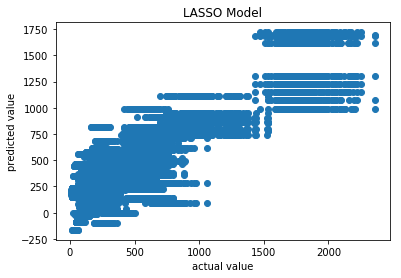

In [19]:
plt.scatter(y_train, lasso_train_pred)
plt.title('LASSO Model')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

***Ridge Regression***

In [20]:
# create a Ridge regression model
ridge_reg = Ridge()  
ridge_model = ridge_reg.fit(X_train, y_train)

#predict X_train using the model
ridge_train_pred = ridge_model.predict(X_train)

#predict X_validate using the model
ridge_validate_pred = ridge_model.predict(X_validate)

# check the rmse of the model
ridge_train_error = rmse(ridge_train_pred, y_train)
ridge_validate_error = rmse(ridge_validate_pred, y_validate)


In [21]:
# Summary Statistics

ridge_train_error = rmse(ridge_train_pred, y_train)
ridge_validate_error = rmse(ridge_validate_pred, y_validate)
ridge_train_aic = AIC(X_train.shape[1], X_train.shape[0], X_train.shape[0] * ridge_train_error ** 2)
ridge_validate_aic = AIC(X_validate.shape[1], X_validate.shape[0], X_validate.shape[0] * ridge_validate_error ** 2)
ridge_train_bic = BIC(X_train.shape[1], X_train.shape[0], X_train.shape[0] * ridge_train_error ** 2)
ridge_validate_bic = BIC(X_validate.shape[1], X_validate.shape[0], X_validate.shape[0] * ridge_validate_error ** 2)

print("Training RMSE:", ridge_train_error)
print("Validation RMSE:", ridge_validate_error)
print("Training AIC:", ridge_train_aic)
print("Validation AIC", ridge_validate_aic)
print("Training BIC:", ridge_train_bic)
print("Validation BIC", ridge_validate_bic)
print('Training R2:', r2_score(ridge_train_pred, y_train))
print('Validation R2:', r2_score(ridge_validate_pred, y_validate))

Training RMSE: 228.1144704006049
Validation RMSE: 224.7266577212826
Training AIC: 238.35926780337905
Validation AIC 240.61634340881574
Training BIC: 231370.25775084147
Validation BIC 77688.03194968552
Training R2: 0.5305355105514333
Validation R2: 0.5354698916000191


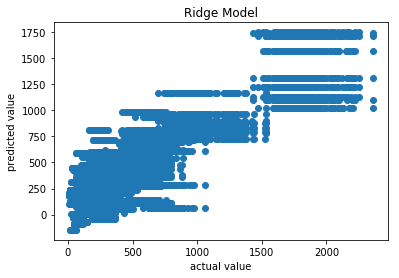

In [22]:
plt.scatter(y_train, ridge_train_pred)
plt.title('Ridge Model')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [23]:
# Summary Statistics Table

summary_stats = pd.DataFrame(data = {"Model": ["OLS Linear", "LASSO", "Ridge"],
                                     "Training RMSE": [lin_train_error, lasso_train_error, ridge_train_error],
                                     "Validation RMSE": [lin_validate_error, lasso_validate_error, ridge_validate_error],
                                    "Training AIC": [lin_train_aic, lasso_train_aic, ridge_train_aic],
                                    "Validation AIC": [lin_validate_aic, lasso_validate_aic, ridge_validate_aic],
                                    "Training BIC": [lin_train_bic, lasso_train_bic, ridge_train_bic],
                                    "Validation BIC": [lin_validate_bic, lasso_validate_bic, ridge_validate_bic],
                                    "Training R2":[r2_score(lin_train_pred, y_train), r2_score(lasso_train_pred, y_train), r2_score(ridge_train_pred, y_train)],
                                    "Validation R2": [r2_score(lin_validate_pred, y_validate), r2_score(lasso_validate_pred, y_validate), r2_score(ridge_validate_pred, y_validate)]}
)
summary_stats.set_index("Model")


,Training RMSE,Validation RMSE,Training AIC,Validation AIC,Training BIC,Validation BIC,Training R2,Validation R2
Model,,,,,,,,
OLS Linear,228.115703,224.725455,238.359246,240.616365,231370.486607,77687.956377,0.530528,0.535478
LASSO,230.337085,226.847286,238.320483,240.578774,231780.932990,77820.631524,0.513909,0.519527
Ridge,228.114470,224.726658,238.359268,240.616343,231370.257751,77688.031950,0.530536,0.535470


**The three models we are choosing is the OLS linear model, LASSO regression and ridge regression model. The model that generates the least root mean squared errors for the validate dataset is the OLS linear model, which establishes a relationship between the dependent variable and independent variable using a best fit line by minimizing the cost function (sum of squared errors). However, the two other models are also useful in terms of relieving the issue of overfitting by incorporating the regularization parameter of penalty to the cost fucntion that helps to prevent from predicting noisy data. Ridge regression is helpful when there is multicollinear data (data where two or more features are very similar and dependent) because it weights those equally and shrink the regression coefficients. LASSO allows coefficients to shrink to 0, which makes it especially attractive when you have lots of features when it automatically performs feature selection. In this dataset, the three linear models produce roughly the same accuracy.**

In [24]:
np.random.seed(100)

NY_X_test = ny_incidents[features].drop(columns = ['number_crimes'])

NY_y_test = ny_incidents['number_crimes']


In [25]:

#predict NY data using the trained OLS model
NY_lin_test_pred = lin_model.predict(NY_X_test)

NY_lin_test_error = rmse(NY_lin_test_pred, NY_y_test)
NY_lin_test_aic = AIC(NY_X_test.shape[1], NY_X_test.shape[0], NY_X_test.shape[0] * NY_lin_test_error ** 2)
NY_lin_test_bic = BIC(NY_X_test.shape[1], NY_X_test.shape[0], NY_X_test.shape[0] * NY_lin_test_error ** 2)

print("Testing RMSE:", NY_lin_test_error)
print("Testing AIC:", NY_lin_test_aic)
print("Testing BIC:", NY_lin_test_bic)
print('Testing R2:', r2_score(NY_lin_test_pred, NY_y_test))


Testing RMSE: 2444477020.5508432
Testing AIC: 167.85999450364812
Testing BIC: 16232907.856910601
Testing R2: -0.0004636756778515494


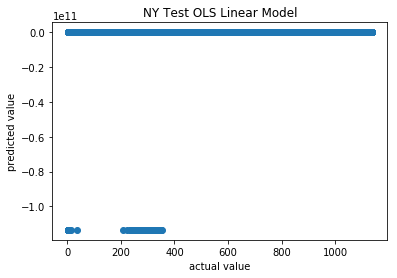

In [26]:
plt.scatter(NY_y_test, NY_lin_test_pred)
plt.title('NY Test OLS Linear Model')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [27]:

#predict NY data using the trained OLS model
NY_lasso_test_pred = lasso_model.predict(NY_X_test)

NY_lasso_test_error = rmse(NY_lasso_test_pred, NY_y_test)
NY_lasso_test_aic = AIC(NY_X_test.shape[1], NY_X_test.shape[0], NY_X_test.shape[0] * NY_lasso_test_error ** 2)
NY_lasso_test_bic = BIC(NY_X_test.shape[1], NY_X_test.shape[0], NY_X_test.shape[0] * NY_lasso_test_error ** 2)

print("Testing RMSE:", NY_lasso_test_error)
print("Testing AIC:", NY_lasso_test_aic)
print("Testing BIC:", NY_lasso_test_bic)
print('Testing R2:', r2_score(NY_lasso_test_pred, NY_y_test))


Testing RMSE: 1668.843997412478
Testing AIC: 224.64883686712434
Testing BIC: 5572989.073598935
Testing R2: -0.5119666182594569


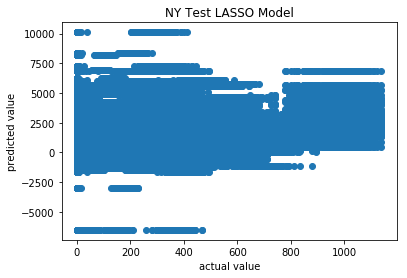

In [28]:
plt.scatter(NY_y_test, NY_lasso_test_pred)
plt.title('NY Test LASSO Model')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [29]:

#predict NY data using the trained OLS model
NY_ridge_test_pred = ridge_model.predict(NY_X_test)

NY_ridge_test_error = rmse(NY_ridge_test_pred, NY_y_test)
NY_ridge_test_aic = AIC(NY_X_test.shape[1], NY_X_test.shape[0], NY_X_test.shape[0] * NY_ridge_test_error ** 2)
NY_ridge_test_bic = BIC(NY_X_test.shape[1], NY_X_test.shape[0], NY_X_test.shape[0] * NY_ridge_test_error ** 2)

print("Testing RMSE:", NY_ridge_test_error)
print("Testing AIC:", NY_ridge_test_aic)
print("Testing BIC:", NY_ridge_test_bic)
print('Testing R2:', r2_score(NY_ridge_test_pred, NY_y_test))


Testing RMSE: 1566.3502922340845
Testing AIC: 224.90236851148285
Testing BIC: 5525398.268338931
Testing R2: -0.5365254828917252


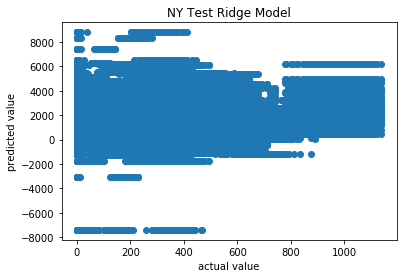

In [30]:
plt.scatter(NY_y_test, NY_ridge_test_pred)
plt.title('NY Test Ridge Model')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

**Clearly, using the model trained from the SF dataset does not perform well in the NY dataset. However, this can be explained in different ways. Given all of the features, we are trying to predict only one response variable: the number of crimes. There are many other variables that may not be able to be incorporated in the model - we are using the dataset that records the number of crimes in a city with a population less than 1 million to predict that in a city with a population greater than 8 million. This can cause significant errors. Also, since we are summing up all of the crimes, we also fail to examine specific types of crimes in relation to some features. Perhaps some cities with a higher population living below the poverty line will suffer more thefts and robberies. And this is also not acconted for and can be integrated when constructing the model.**